![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex_MALE
0              39.1             18.7              181.0       3750.0         1
1              39.5             17.4              186.0       3800.0         0
2              40.3             18.0              195.0       3250.0         0
3              36.7             19.3              193.0       3450.0         0
4              39.3             20.6              190.0       3650.0         1
       culmen_length_mm  cul

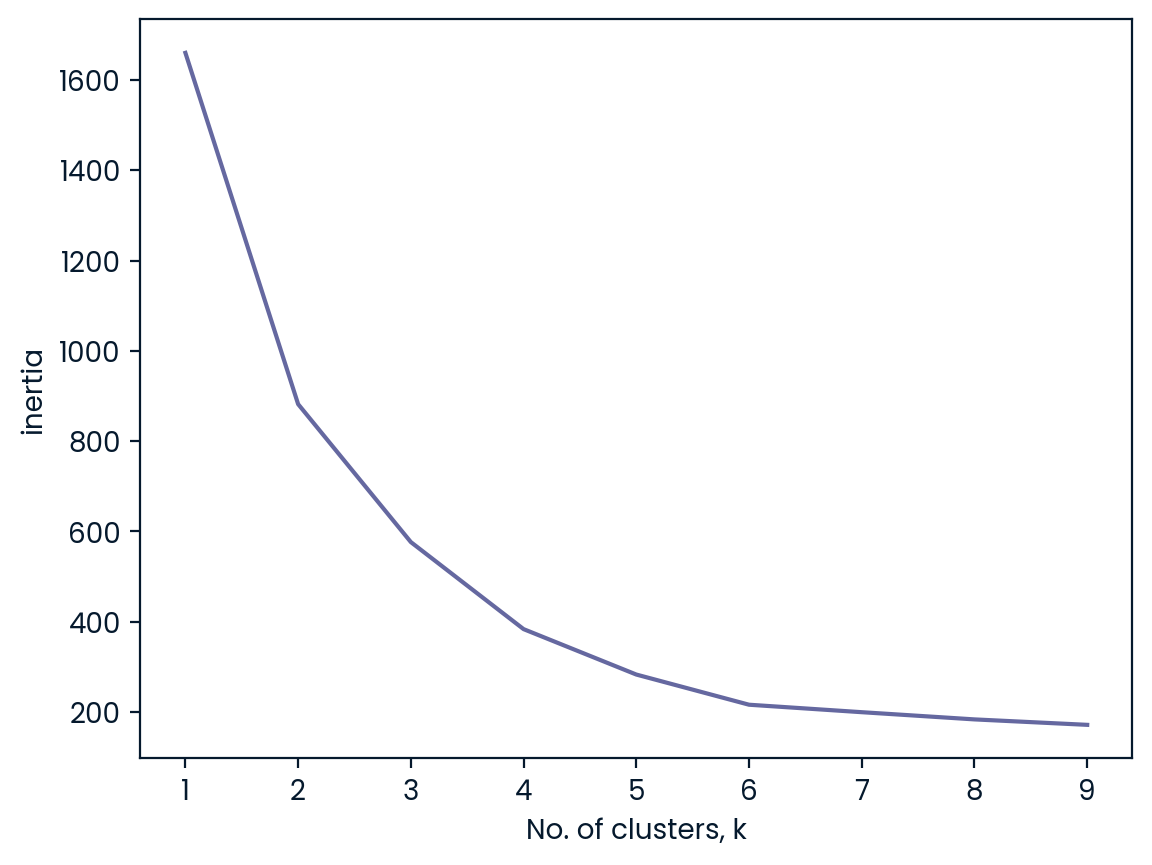

[0 2 2 2 0 2 0 2 0 2 2 0 2 3 2 0 2 0 0 2 0 2 2 0 2 0 2 0 2 0 0 2 2 0 2 0 2
 0 2 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 3 2 0 2 0 2 0 2
 0 2 0 2 0 0 2 0 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 2 2 0 2 0 2 3 3
 2 3 2 2 3 2 3 2 3 2 3 2 3 3 3 2 3 2 3 2 3 2 3 3 3 2 3 2 3 2 3 3 2 2 3 2 3
 3 2 3 2 3 3 2 3 3 2 2 3 2 3 2 3 2 3 3 2 3 2 2 3 2 3 3 3 1 4 1 4 4 1 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 4 1 1 4 1 4 4 1 4 4 1 1 4 1 4 1 4 1 4 1 4 1 4 4 1 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 4 1 4 1 4 4 1 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 4 1 1 4 1 4 1 4 4 1 4 1 4 1 4 1 4 1 4 4 1 1 4 1 4]


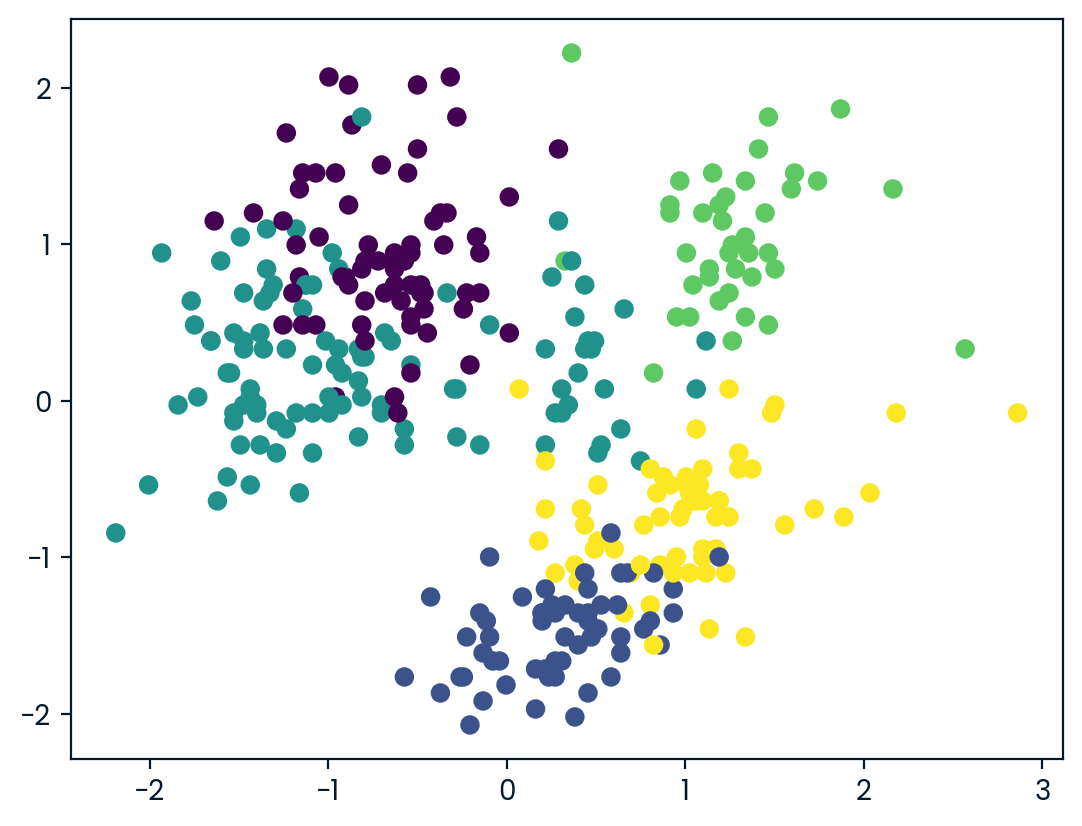

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
label                                                                   
0             40.315714        19.011429         192.242857  4034.642857
1             45.563793        14.237931         212.706897  4679.741379
2             39.744660        17.588350         188.864078  3410.679612
3             50.965000        19.195000         199.075000  3920.625000
4             49.473770        15.718033         221.540984  5484.836066


In [33]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
#penguins_df.head()
print(penguins_df.info())
# Convert sex to binary
pg_encoded = pd.get_dummies(penguins_df, drop_first=True)
print(pg_encoded.head())
print(pg_encoded.describe())

# Standardizing the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pg_encoded)

inertias = []
k_values = range(1, 10)
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42).fit(scaled_data)
    inertias.append(model.inertia_)

plt.plot(k_values, inertias)
plt.xlabel('No. of clusters, k')
plt.ylabel('inertia')
plt.xticks(k_values)
plt.show()

# Clustering dataset
kmeans_model = KMeans(n_clusters=5, random_state=42).fit(scaled_data)
labels = kmeans_model.predict(scaled_data)
print(labels)
xs = scaled_data[:, 0]
ys = scaled_data[:, 1]
plt.scatter(xs, ys, c=labels)
plt.show()

# Create a DataFrame to hold the numeric columns and the labels
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
pg_encoded['label'] = kmeans_model.labels_

stat_penguins = pg_encoded.groupby('label')[numeric_columns].mean()
print(stat_penguins)